# Jupyter Tutorial for Analysis of Radio/Millimeter Data

## (1) Importing Python packages you will be using

In [1]:
#Use this window to import packages you will use later
#When you first start working or import a new package, this cell needs to be run before doing anything else.


import numpy as np                      # I use this for maths and sometimes arrays.
                                        # "np" is just an abbreviation since we call this package so often!
import pylab                            # I use this for arrays and plotting
import matplotlib                       # Another plotting package
import matplotlib.gridspec as gridspec  # If there is a task you use a lot, importing it like this 
                                        # keeps you from having to constantly type "matplotlib.gridspec"
                                        # every time you call that task!
import scipy
import astropy.io.fits as fits          # I use this to import FITS images. 
                                        # Astropy should be included in your conda installation
from astropy.wcs import WCS             # This one helps us add coordinates to images
import pyspeckit as psk                 # I use this to do spectral line fitting
                                        # You probably don't have it installed; 
                                        # to install, type 'pip install pyspeckit' in a terminal window
                                        #Anna: Had to install using an anaconda terminal window, its located at Users\Anna\AppData\Local\pip




# Super important: This embeds plots in the Jupyter window (instead of showing them as pop-ups)
%matplotlib inline                             

#Set plot fonts
matplotlib.rc('text', usetex=False)
matplotlib.rc('font', family='sans-serif')

#Most of our work will be done in "code" type cells, like this.

print('Success') #Added by Anna to make sure this cell works

Success


### In the menu above, you can change the cell type to "markdown" and add useful comments about your work!

#### You can change font size in these cells by changing the number of hashtags in front of the text. To quickly execute a single cell, you can either click "run" in the menu above, or hit shift + enter 

## (2) Importing and Exporting Data Files

In [2]:
# Lets import our first data file, and take a look at its structure:

path = 'H8_continuum.pbcor.fits'   # This string is not just the name of a file, but its full address.
                                        # If, like this file, it is in the same directory as your notebook,
                                        # you can specify just the filename. If it lives elsewhere you need
                                        # to give a relative (e.g., data/name.fits or ../directory/name.fits)
                                        # or absolute (e.g., EACMills/Project/Data/name.fits) path to the file.

# The fits images we will work with consist of two main parts:
# (1) An array of 2-4 dimensions that holds the value of each image pixel as a decimal (float) number
# (2) A "header" which contains a summary of information in or associated with this array                
          

image = fits.getdata(path)  # This command reads in the data array part of the fits file, so we can manipulate it 
                            # like any other python array
    
header = fits.getheader(path)   # This command reads in the header, which consists of a series of variables 
                                # and associated values        
        
print(header) #You can print the entire header just to see its contents

    
# These commands cover most of the data input (reading from files) that we will do.
# Note that there are other commands in pythin that will perform the same or similar functions.
# Check out the documentation for astropy.io.fits: https://docs.astropy.org/en/stable/io/fits/
# And for spectral cube: https://spectral-cube.readthedocs.io/en/latest/

# For completeness, I also include an example of the commands used for data output (writing to files)
# You would use this if you modified the image or header in some way, and wanted to make a new file.

# Lets say that we want to change the units of our image from Jy/beam to mJy/beam. 
# 1 Jy = 1000 mJy so we would multiply our image by 1000:

mJy_image = image * 1000

# We would also want to update the header to reflect these new units:

header['BUNIT'] = 'mJy/beam '

# Then we could save both as a new FITS image (note that there will be an error if this file already exists!):

fits.writeto('H8_continuum_mJy.pbcor.fits',mJy_image,header)

#Anna: this works! The new fits file exists in this directory, so if run again, should be an error


SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                  288                                                  NAXIS2  =                  288                                                  NAXIS3  =                    1                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   6.752061181598E-04                                                  BMIN    =   5.309024122026E-04                                                  BPA     =  -8.687633514404E+01          

OSError: File 'H8_continuum_mJy.pbcor.fits' already exists.

## (3) Coordinate Systems

In [3]:
# Ultimately, we want to be able to refer to our images using "sky" coordinates:
# Right Ascension and Declination, or Galactic coordinates. 

# There are several tools that make it relatively easy to switch between pixel coordinates and sky coordinates.

# One tool is the WCS command:

w = WCS(header)      # This command grabs information from the header, but focuses just on the
                            # the part of the header that tells you how pixel coordinates correspond to 
                            # sky coordinates
        
#To see the information that this provides, print it out:

print(w)

# It turns out that there is a slight issue here that we need to address: our image has 4 dimensions, 
# but only 2 of those dimensions have information: the Right Ascension axis (288 pixels long) 
# and the Declination axis (288 pixels long). The other two axes (Frequency and Stokes) have only one pixel each
# This is because there is noq polarization (Stokes) information, and this is a continuum image so it does not have
# information on emission at different frequencies.
# This means we are basically working with a 2D (288 x 288) image. 

# We will thus do two things: first, we will remove the extra axes from the WCS data:

w = w.dropaxis(3) #NAXIS 4
w = w.dropaxis(2) #NAXIS 3

print(w) #You can uncomment this to print wcs_data again and confirm that this worked
         #Anna: changed name from wcs_data to w bc thats what its called

#We also want to remove these extra axes from the image array.

print("The current image shape is: ", np.shape(image))  # This command tells us how many dimensions the image data has, 
                                                        # and the number of pixels along each axis
    
image_2D = pylab.squeeze(image) #gets rid of axes with length 1

print("The new image shape is: ", np.shape(image_2D))  # This command tells us how many dimensions the image data has, 
                                                        # and the number of pixels along each axis


    

# Defining the WCS also lets us take a set of coordinates and change it from pixels to sky coordinates and vice versa.
# For example, let's figure out the RA and Dec at a position near the center of the image: x=144, y=144

RA, Dec = w.all_pix2world(144,144,0)

print(RA,Dec) #Notice that these are given in units of degrees

#Anna: all seems to work


WCS Transformation

This transformation has 4 pixel and 4 world dimensions

Array shape (Numpy order): (1, 1, 288, 288)

Pixel Dim  Data size  Bounds
        0        288  None
        1        288  None
        2          1  None
        3          1  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg
        2  em.freq        Hz
        3  None           unknown

Correlation between pixel and world axes:

               Pixel Dim
World Dim    0    1    2    3
        0  yes  yes   no   no
        1  yes  yes   no   no
        2   no   no  yes   no
        3   no   no   no  yes
WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (1, 1, 288, 288)

Pixel Dim  Data size  Bounds
        0        288  None
        1        288  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World

'obsfix' made the change 'Set OBSGEO-L to   -67.754929 from OBSGEO-[XYZ].
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.


## (4) Displaying Images

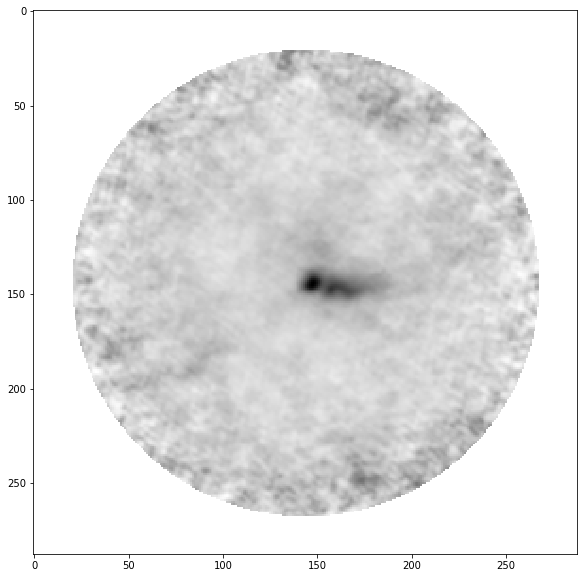

In [14]:
# Let's see what this image actually looks like!

# Here we define our first figure. We will make this figure #1 and give it a size of 10x10
fig1 = pylab.figure(1,figsize=(10,10))

#We will now make sure that our image is plotted with sky coordinates
#ax1 = pylab.subplot(projection=w)
ax1 = pylab.subplot()
#lon = ax1.coords[0]
#lat = ax1.coords[1]

im1 = pylab.imshow(image_2D,cmap='Greys')

# Try uncommenting the options below to see how each one changes this figure!
#lon.set_ticks(size=-5)
#lat.set_ticks(size=-5)
#pylab.xlabel('Right Ascension',fontsize=20)
#pylab.ylabel('Declination',fontsize=20)
#ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
#pylab.annotate(s='ALMA Continuum',fontsize=25,xy=(0.05,0.95),xycoords="axes fraction")
#pylab.colorbar()
#ax.add_patch(




## (5) Moment Maps

All-NaN slice encountered


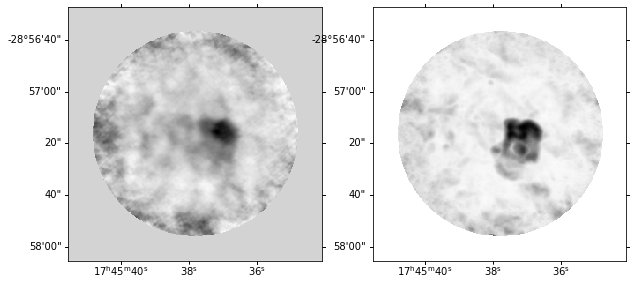

In [4]:
# A lot of the data sets we will work with this summer actually have 3 dimensions of interest
# These data sets are referred to as data cubes.
# In addition to the two position axes we saw before, we now also have a frequency axis
# This means our data is a bit like a movie: it consists of a bunch of 2D images, each taken at a different frequency
# We usually refer to the elements in an array along the frequency axis as "channels" 
# (just like the elements in a 2D image array are called pixels)
# We read in these images the same way as the 2D continuum image we just looked at:


new_path = 'H8_13C16O.cube.pbcor.fits'   
cube = pylab.squeeze(fits.getdata(new_path))   # here we are skipping a step and getting rid of the 4th image axis 
                                            # (Stokes) since it still doesn't have data and we don't need it. 
cheader = fits.getheader(new_path)  


# Since it is hard to plot a 3D image, there are a few standard approaches we can take. One of them is to make
# something know as a 'moment map'. Here we essentially integrate over the frequency axis. We can take the sum of
# all the pixels (channels) along this axis ("Moment 0") or do some fancier things to instead get the brightest
# value over all the channels in the cube, or even an average velocity for each spatial pixel.


#Let's start with the simplest option and make a frequency-summed or "Moment 0" image of this cube


mom_0 = np.nansum(cube,axis=0)  # notice how the image above looked like a circle, but our array is a 2D rectangle? 
                                # This means that some of the data has been masked by assigning it a value of NAN
                                # We can deal with this, but we have to use special functions (nansum instead of sum)

# Let's also make a map of the maximum value corresponding to each pixel
maxval = np.nanmax(cube,axis=0)

# Now lets make a fancier figure: a 2-panel, side-by side figure. Check out the online documentation for subplot
# if you have questions about how this works!
fig2 = pylab.figure(2,figsize=(10,5))
ax2 = pylab.subplot(1,2,1,projection=w) # Since we are looking at the same object, we can keep our WCS information
im2 = pylab.imshow(mom_0,cmap='Greys')
ax3 = pylab.subplot(1,2,2, projection=w)
im3=pylab.imshow(maxval,cmap='Greys')

# Try overplotting the continuum image as contours
# pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

# Try changing and adding to the plot axis labels like you did for the continuum image.



#pylab.savefig('12CO_peak.pdf') #Uncomment this to save your current figure as a PDF in this directory

In [ ]:
# Try making these same figures for the other 3 data cubes in the directory (12C16O, 12C18O, 12C17O).
# If you are feeling fancy, try to make a loop that would iterate through each image!

## (6) Spectra 

Text(0.01, 0.9, 'Spectrum at position (151,170)')

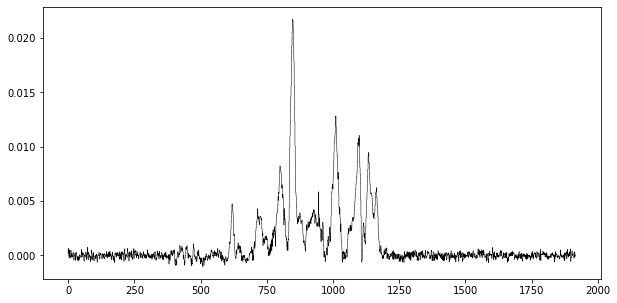

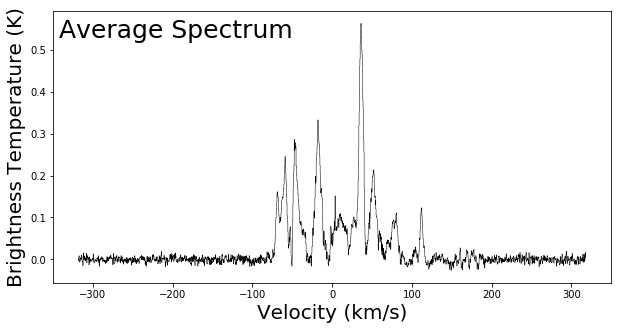

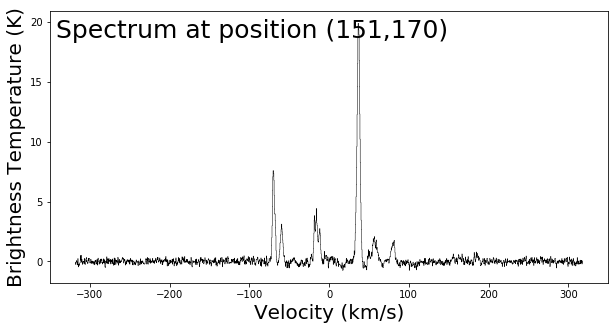

In [17]:
# In addition to moment maps, there are several other ways to extract 1D and 2D information from a data cube.
# The most common is to extract 1D frequency information as spectra

new_path = 'H8_13C16O.cube.pbcor.fits'   
cube = pylab.squeeze(fits.getdata(new_path))
cheader = fits.getheader(new_path) 

# We can start by doing something similar to waht we did to make the moment 0 map, but now averaging the data 
# over the two spatial (RA, Dec) axes:

total_spectrum = np.nanmean(cube,axis=(1,2))

#We can then plot this information:

fig3 = pylab.figure(3,figsize=(10,5))
ax3=pylab.subplot() # No need for WCS information since this is just flux vs. frequency!
ax3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')

# Right now we have a problem with our X-axis, which is specified in terms of pixels.
# We would rather this be in a more meaningful unit like frequency or velocity. 

# We can use the information in the header to define the x-axis by hand, doing the math to transform pixel to velocity

size = cheader["NAXIS3"] # number of frequency channels
rest= cheader["RESTFRQ"] / 1.0e9 # go from Hz to GHz
f0 = cheader["CRVAL3"] / 1.0e9 # go from Hz to GHz
df = cheader["CDELT3"] / 1.0e9 # go from Hz to GHz
v0_kms = cheader["ALTRVAL"] / 1000.0 # go from m/s to km/s
dv_kms = df / rest * 2.998e5 * -1 # convert from delta-frequency to delta-velocity
pix = cheader["CRPIX3"]


x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

# While we are at it, we can get information about the image resolution (the "beam")
# and use this to change the flux units from Jy to K
bmaj = cheader["BMAJ"] * 3600
bmin = cheader["BMIN"] * 3600
    
# Scale from Jy to K based on aperture and the rest frequency
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)
            
#Now we can make an improved plot!

fig4 = pylab.figure(4,figsize=(10,5))
ax4=pylab.subplot() 
ax4.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
pylab.xlabel('Velocity (km/s)',fontsize=20)
pylab.ylabel('Brightness Temperature (K)',fontsize=20)
pylab.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")

#If you prefer a frequency x axis, swap out for the two lines below
#ax4.plot(x_freq,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.xlabel('Right Ascension',fontsize=20)



# While this is a fairly easy way to make a spectrum, averaging over the entire field of view is not
# typically what you want to do. When trying to get a spectrum to do science with, we instead like to
# extract the spectrum from a single pixel (or group of pixels)

#Let's figure out which position in the cube has the strongest emission
coords = pylab.where(cube==np.nanmax(cube))

# This returns the channel number (coords[0]), x position (coords[1]), and y position (coords[2])
# of the maximum value in the cube

#Then, we can extract and plot a spectrum at this position
fig5 = pylab.figure(5,figsize=(10,5))
ax5=pylab.subplot() 
ax5.plot(x_vel,cube[:,coords[1],coords[2]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
pylab.xlabel('Velocity (km/s)',fontsize=20)
pylab.ylabel('Brightness Temperature (K)',fontsize=20)
pylab.annotate(s='Spectrum at position (%i,%i)'%(coords[1],coords[2]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")

# A few exercises:


## (1) Find the RA, Dec coordinates that correspond to pixel coordinates (x=175, y=150)

## (2) Make an image that is the ratio of two of the moment 0 maps you created

## (3) Experiment with displaying images usng different color maps

## (4) Find the RA and Dec that correspond to the brightest emission in the continuum image and search for any known objects at that position: http://simbad.u-strasbg.fr/simbad/sim-fcoo